In [1]:
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Lambda
from tensorflow.keras import backend as K

In [2]:
def get_siamese_model(input_shape):

    left_input = Input(input_shape)
    right_input = Input(input_shape)
    model = Sequential()
    model.add(Conv2D(64, (10, 10), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D())
    model.add(Conv2D(128, (7, 7), activation='relu'))
    model.add(MaxPooling2D())
    model.add(Conv2D(128, (4, 4), activation='relu'))
    model.add(MaxPooling2D())
    model.add(Conv2D(256, (4, 4), activation='relu'))
    model.add(Flatten())
    model.add(Dense(4096, activation='sigmoid'))
    encoded_l = model(left_input)
    encoded_r = model(right_input)
    l1_layer = Lambda(lambda tensors: K.abs(tensors[0] - tensors[1]))
    l1_distance = l1_layer([encoded_l, encoded_r])
    prediction = Dense(1, activation='sigmoid')(l1_distance)
    siamese_net = Model(inputs=[left_input, right_input], outputs=prediction)

    return siamese_net

In [3]:
siamese_model = get_siamese_model((224,224,3))

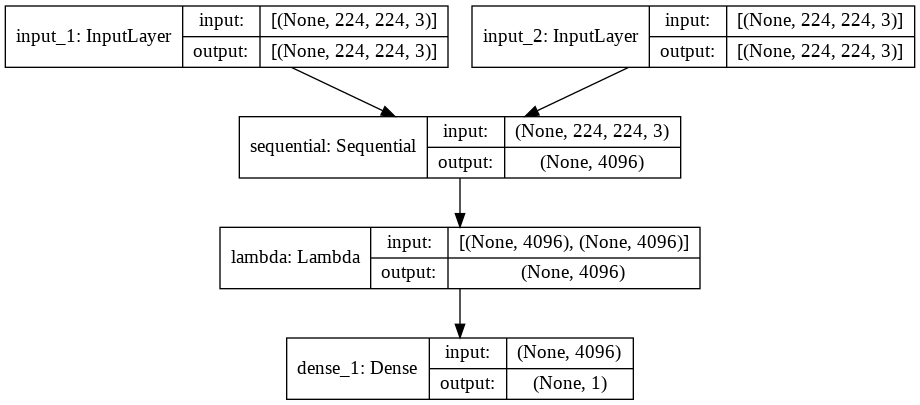

In [4]:
from tensorflow.keras.utils import plot_model

plot_model(siamese_model, show_shapes=True, show_layer_names=True)